In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score, KFold, GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import  make_scorer
from sklearn.metrics import r2_score



# Aperçu des fichiers

In [2]:
df_2015=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/building_energy/2015-building-energy-benchmarking.csv')
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:

df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
df_2016=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/building_energy/2016-building-energy-benchmarking.csv')
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

La structure des données a changé entre 2015 et 2016. Vérifions quelles colonnes sont différentes.

In [6]:
list_1 = list(df_2015.columns) 
list_2 = list(df_2016.columns)

def сomparaison (list_1, list_2):
    dif_2015_2016 = list(set(list_1) - set(list_2))
    dif_2016_2015 = list(set(list_2) - set(list_1))
    return dif_2015_2016 , dif_2016_2015

print("Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :")
сomparaison(list_1, list_2)[0]


Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :


['OtherFuelUse(kBtu)',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'City Council Districts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'SPD Beats',
 'Zip Codes',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas']

In [7]:
print("Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :")
сomparaison(list_1, list_2)[1]

Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :


['Comments',
 'Latitude',
 'TotalGHGEmissions',
 'State',
 'GHGEmissionsIntensity',
 'City',
 'ZipCode',
 'Address',
 'Longitude']

In [8]:
var_15=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
             'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
             'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']

In [9]:
df_2015[var_15].describe()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [10]:
var_16=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
             'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
             'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [11]:
df_2016[var_16].describe()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,119.723971,1.175916
std,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,538.832227,1.821452
min,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,9.495000,0.210000
50%,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,33.920000,0.610000
75%,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,93.940000,1.370000
max,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


Les variables sont les mêmes:
+ GHGEmissionsIntensity(kgCO2e/ft2) (2015) et GHGEmissionsIntensity(2016)
+ GHGEmissions(MetricTonsCO2e)(2015) et TotalGHGEmissions(2016)

In [12]:
# Renaming columns

df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

In [13]:
df_2015.duplicated().value_counts()
df_2016.duplicated().value_counts()

False    3376
dtype: int64

In [14]:
df_2015=df_2015.dropna(axis=0, how='all')
df_2016=df_2016.dropna(axis=0, how='all')

Voici une fonction qui calcule le nombre de valeurs manquantes et le pourcentage des valeurs totales manquantes pour chaque colonne.

In [15]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df_2015)

Your selected dataframe has 47 columns.
There are 32 columns that have missing values.


,Missing Values,% of Total Values
Comment,3327,99.6
Outlier,3256,97.5
YearsENERGYSTARCertified,3230,96.7
City Council Districts,3127,93.6
2010 Census Tracts,3116,93.3
ThirdLargestPropertyUseType,2780,83.2
ThirdLargestPropertyUseTypeGFA,2780,83.2
SecondLargestPropertyUseType,1781,53.3
SecondLargestPropertyUseTypeGFA,1781,53.3
ENERGYSTARScore,780,23.4


In [17]:
df_2015['Comment'].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [18]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_2015);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 47 columns.
There are 32 columns that have missing values.
We will remove 9 columns.


In [19]:
# Drop the columns
df_2015 = df_2015.drop(columns = list(missing_columns))

In [20]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [21]:
missing_values_table(df_2016)

Your selected dataframe has 46 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Comments,3376,100.0
Outlier,3344,99.1
YearsENERGYSTARCertified,3257,96.5
ThirdLargestPropertyUseTypeGFA,2780,82.3
ThirdLargestPropertyUseType,2780,82.3
SecondLargestPropertyUseType,1697,50.3
SecondLargestPropertyUseTypeGFA,1697,50.3
ENERGYSTARScore,843,25.0
LargestPropertyUseType,20,0.6
LargestPropertyUseTypeGFA,20,0.6


In [22]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_2016);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 46 columns.
There are 26 columns that have missing values.
We will remove 7 columns.


In [23]:
# Drop the columns
df_2016 = df_2016.drop(columns = list(missing_columns))

In [24]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3376 non-null   int64  
 1   DataYear                       3376 non-null   int64  
 2   BuildingType                   3376 non-null   object 
 3   PrimaryPropertyType            3376 non-null   object 
 4   PropertyName                   3376 non-null   object 
 5   Address                        3376 non-null   object 
 6   City                           3376 non-null   object 
 7   State                          3376 non-null   object 
 8   ZipCode                        3360 non-null   float64
 9   TaxParcelIdentificationNumber  3376 non-null   object 
 10  CouncilDistrictCode            3376 non-null   int64  
 11  Neighborhood                   3376 non-null   object 
 12  Latitude                       3376 non-null   f

+ Nous laissons les variables qui sont présentes dans les deux bases de données.
+ Nous supprimons les variables qui ne sont pas importantes pour l'apprentissage automatique.


In [25]:
df_15=df_2015

In [26]:
df_15=df_15.drop(['PropertyName', 'TaxParcelIdentificationNumber','Location','ListOfAllPropertyUseTypes',
                    'DefaultData', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Zip Codes',
                  'Seattle Police Department Micro Community Policing Plan Areas'], axis=1)

In [27]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3340 non-null   int64  
 1   DataYear                   3340 non-null   int64  
 2   BuildingType               3340 non-null   object 
 3   PrimaryPropertyType        3340 non-null   object 
 4   CouncilDistrictCode        3340 non-null   int64  
 5   Neighborhood               3340 non-null   object 
 6   YearBuilt                  3340 non-null   int64  
 7   NumberofBuildings          3340 non-null   int64  
 8   NumberofFloors             3332 non-null   float64
 9   PropertyGFATotal           3340 non-null   int64  
 10  PropertyGFAParking         3340 non-null   int64  
 11  PropertyGFABuilding(s)     3340 non-null   int64  
 12  LargestPropertyUseType     3204 non-null   object 
 13  LargestPropertyUseTypeGFA  3204 non-null   float

In [28]:
df_16=df_2016

In [29]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3376 non-null   int64  
 1   DataYear                       3376 non-null   int64  
 2   BuildingType                   3376 non-null   object 
 3   PrimaryPropertyType            3376 non-null   object 
 4   PropertyName                   3376 non-null   object 
 5   Address                        3376 non-null   object 
 6   City                           3376 non-null   object 
 7   State                          3376 non-null   object 
 8   ZipCode                        3360 non-null   float64
 9   TaxParcelIdentificationNumber  3376 non-null   object 
 10  CouncilDistrictCode            3376 non-null   int64  
 11  Neighborhood                   3376 non-null   object 
 12  Latitude                       3376 non-null   f

In [30]:
df_16=df_2016.drop(['PropertyName', 'TaxParcelIdentificationNumber', 'Latitude', 'Longitude' ,'ListOfAllPropertyUseTypes',
                    'DefaultData', 'Address', 'City', 'State', 'ZipCode'], axis=1)

In [31]:

list_1 = list(df_15.columns) 
list_2 = list(df_16.columns)
сomparaison(list_1, list_2)

([], [])

Les deux bases de données ont la même taille.

In [32]:
# Vérifions si les types sont identiques entre 2015 et 2016.

pd.DataFrame([df_15.dtypes, df_16.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus
0,int64,int64,object,object,int64,object,int64,int64,float64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
1,int64,int64,object,object,int64,object,int64,float64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object


Les variables 'NumberofBuildings' et 'NumberofFloors' ont un format différent. Je ne peux pas le changer maintenant depuis que j'ai nan. Je le ferai plus tard

In [33]:
# usionner deux bases de données en une seule

df = pd.concat([df_15[df_16.columns],df_16], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,Compliant,249.43,2.64
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,Compliant,263.51,2.38
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Compliant,2061.48,1.92
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,...,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,Compliant,1936.34,31.38
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,...,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,Compliant,507.70,4.02


In [34]:
df.shape

(6716, 29)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              6716 non-null   int64  
 1   DataYear                   6716 non-null   int64  
 2   BuildingType               6716 non-null   object 
 3   PrimaryPropertyType        6716 non-null   object 
 4   CouncilDistrictCode        6716 non-null   int64  
 5   Neighborhood               6716 non-null   object 
 6   YearBuilt                  6716 non-null   int64  
 7   NumberofBuildings          6708 non-null   float64
 8   NumberofFloors             6708 non-null   float64
 9   PropertyGFATotal           6716 non-null   int64  
 10  PropertyGFAParking         6716 non-null   int64  
 11  PropertyGFABuilding(s)     6716 non-null   int64  
 12  LargestPropertyUseType     6560 non-null   object 
 13  LargestPropertyUseTypeGFA  6560 non-null   float

# Description et nettoyage des données

In [36]:
df.duplicated().value_counts()

False    6716
dtype: int64

Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType.


In [37]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [38]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

Comments les variables qui se terminent par WN (Weather Normalized) qui sont des corrections des conditions climatiques.
Discribe montre presque la même distribution. Par conséquent, je supprime les variables se terminant par WN.

In [39]:
df=df.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'], axis=1)

+ Electricity(kWh)/Electricity(kBtu)
+ NaturalGas(therms)/NaturalGas(kBtu)

La consommation d'énergie et de gaz est exprimée en différentes unités. Par conséquent, je supprime certaines des variables.

In [40]:
df=df.drop(['NaturalGas(therms)','Electricity(kWh)'], axis=1)

In [41]:
# Idem pour la variable GHGEmissionsIntensity
df=df.drop('GHGEmissionsIntensity', axis=1)

In [42]:
# En ce qui concerne l'énergie, nous pouvons éliminer également les données surfaciques

df=df.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)'], axis=1)

In [43]:
df=df.drop('ComplianceStatus', axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3318 non-null   int64  
 1   DataYear                   3318 non-null   int64  
 2   BuildingType               3318 non-null   object 
 3   PrimaryPropertyType        3318 non-null   object 
 4   CouncilDistrictCode        3318 non-null   int64  
 5   Neighborhood               3318 non-null   object 
 6   YearBuilt                  3318 non-null   int64  
 7   NumberofBuildings          3316 non-null   float64
 8   NumberofFloors             3310 non-null   float64
 9   PropertyGFATotal           3318 non-null   int64  
 10  PropertyGFAParking         3318 non-null   int64  
 11  PropertyGFABuilding(s)     3318 non-null   int64  
 12  LargestPropertyUseType     3247 non-null   object 
 13  LargestPropertyUseTypeGFA  3247 non-null   float

In [45]:
# Regardons les valeurs des variables

for column in df.columns:
    if df[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n{}\n'.format(column, df[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(column, df[column].nunique()))

Colonne OSEBuildingID, 1698 valeurs uniques
Colonne DataYear, valeurs uniques :
[2015 2016]

Colonne BuildingType, valeurs uniques :
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

Colonne PrimaryPropertyType, 30 valeurs uniques
Colonne CouncilDistrictCode, valeurs uniques :
[7 3 2 4 5 6 1]

Colonne Neighborhood, valeurs uniques :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']

Colonne YearBuilt, 113 valeurs uniques
Colonne NumberofBuildings, valeurs uniques :
[  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]

Colonne NumberofFloors, 45 valeurs uniques
Colonne PropertyGFATotal, 1667 valeurs uniques
Colonne PropertyGFAParking, 366 valeurs uniques
Colonne PropertyGFABuilding(s), 1694 valeurs uniques
Colonne

In [46]:
df=df.replace(to_replace=['DELRIDGE NEIGHBORHOODS', 'Central', 'Ballard', 'North', 'Delridge', 'Northwest'], 
              value=['DELRIDGE', 'CENTRAL', 'BALLARD', 'NORTH', 'DELRIDGE', 'NORTHWEST'])

In [47]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [48]:
df=df.drop('CouncilDistrictCode', axis=1)

Сertains indicateurs numériques devraient être positifs.

In [49]:
df.min()

OSEBuildingID                                 1
DataYear                                   2015
BuildingType                             Campus
PrimaryPropertyType          College/University
Neighborhood                            BALLARD
YearBuilt                                  1900
NumberofBuildings                             0
NumberofFloors                                0
PropertyGFATotal                          11285
PropertyGFAParking                           -2
PropertyGFABuilding(s)                   -50550
LargestPropertyUseTypeGFA                  5656
ENERGYSTARScore                               1
SiteEnergyUse(kBtu)                           0
SteamUse(kBtu)                                0
Electricity(kBtu)                       -115417
NaturalGas(kBtu)                              0
TotalGHGEmissions                          -0.8
dtype: object

In [50]:
df[(df.PropertyGFAParking) <0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3136,29551,2015,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,2000,1.0,11.0,68452,-2,68454,Office,61665.0,81.0,3670298.0,0.0,3670451.0,0.0,25.59


In [51]:
index_to_drop=df[df['PropertyGFAParking']<0].index
df.drop(index_to_drop, inplace=True)

In [52]:
df[(df['PropertyGFABuilding(s)']) <=0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3139,29788,2015,NonResidential,Small- and Mid-Sized Office,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,97325,-43310,Office,54015.0,65.0,3455247.0,0.0,3455391.0,0.0,24.09
3322,50002,2015,NonResidential,Other,NORTHEAST,2014,1.0,3.0,33648,84198,-50550,Parking,83600.0,NaN,1389553.0,0.0,1389610.0,0.0,9.69


In [53]:

index_to_drop=df[df['PropertyGFABuilding(s)']<=0].index
df.drop(index_to_drop, inplace=True)

In [54]:
# contrôle des valeurs negatives
quantitative_columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
for column in quantitative_columns:
    incoherent_values = df[df[column] <=0]
    if(incoherent_values.shape[0]>0):
        print(column)
        display(incoherent_values)
        df=df.drop(incoherent_values.index)

SiteEnergyUse(kBtu)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
44,58,2015,NonResidential,Retail Store,DOWNTOWN,1920,1.0,2.0,57428,0,57428,Retail Store,34617.0,NaN,0.0,0.0,0.0,0.0,0.00
572,765,2015,NonResidential,Large Office,DOWNTOWN,1929,1.0,27.0,216571,13320,203251,Office,182604.0,NaN,0.0,0.0,0.0,0.0,0.00
28,34,2016,SPS-District K-12,K-12 School,CENTRAL,1955,1.0,1.0,126351,0,126351,K-12 School,126351.0,NaN,0.0,0.0,0.0,0.0,0.00
31,37,2016,SPS-District K-12,K-12 School,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,0,51582,K-12 School,55166.0,NaN,0.0,0.0,1496816.0,0.0,10.43
62,87,2016,SPS-District K-12,K-12 School,SOUTHWEST,1948,1.0,2.0,53352,0,53352,K-12 School,65568.0,NaN,0.0,0.0,600813.0,0.0,4.19
81,118,2016,SPS-District K-12,K-12 School,DELRIDGE,1999,1.0,3.0,74468,0,74468,K-12 School,75364.0,NaN,0.0,0.0,1698176.0,0.0,11.84
85,122,2016,SPS-District K-12,K-12 School,SOUTHEAST,1991,1.0,2.0,58933,0,58933,K-12 School,60725.0,NaN,0.0,0.0,2347138.0,0.0,16.36
95,140,2016,SPS-District K-12,K-12 School,LAKE UNION,1991,1.0,3.0,66588,0,66588,K-12 School,66588.0,NaN,0.0,0.0,2104286.0,0.0,14.67
133,217,2016,SPS-District K-12,K-12 School,BALLARD,1959,1.0,1.0,160270,0,160270,K-12 School,160270.0,NaN,0.0,0.0,0.0,4318917.0,229.38
139,227,2016,SPS-District K-12,K-12 School,CENTRAL,1963,1.0,3.0,136188,0,136188,K-12 School,136188.0,NaN,0.0,0.0,0.0,3217877.0,170.90


TotalGHGEmissions


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
513,700,2016,NonResidential,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0,57176,Supermarket/Grocery Store,39500.0,31.0,1.252517e+07,0.0,0.0,0.0,0.0
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,48159.0,100.0,3.427261e+05,0.0,-115417.0,0.0,-0.8


In [55]:
# Correction du nombre de bâtiments et d'étages (ne peut être nul ou NaN)

df['NumberofBuildings'].fillna(0, inplace=True)
df['NumberofBuildings'].replace(0, 1, inplace=True)
df['NumberofFloors'].fillna(0, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [56]:
df['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,  27.,
        14.,   9.,   5.,   8.,  23., 111.])

In [57]:
df['NumberofFloors'].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  3.,  4., 24., 20., 34.,  1., 16., 23., 17., 36.,
       22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46., 30.,
       56., 76., 99., 39., 27.])

In [58]:
df.min()

OSEBuildingID                                 1
DataYear                                   2015
BuildingType                             Campus
PrimaryPropertyType          College/University
Neighborhood                            BALLARD
YearBuilt                                  1900
NumberofBuildings                             1
NumberofFloors                                1
PropertyGFATotal                          11285
PropertyGFAParking                            0
PropertyGFABuilding(s)                     3636
LargestPropertyUseTypeGFA                  5656
ENERGYSTARScore                               1
SiteEnergyUse(kBtu)                       11441
SteamUse(kBtu)                                0
Electricity(kBtu)                             0
NaturalGas(kBtu)                              0
TotalGHGEmissions                          0.08
dtype: object

In [59]:
# Création d'une nouvelle variable 'BuildingAge'

df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df=df.drop(['DataYear', 'YearBuilt'], axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3274 non-null   int64  
 1   BuildingType               3274 non-null   object 
 2   PrimaryPropertyType        3274 non-null   object 
 3   Neighborhood               3274 non-null   object 
 4   NumberofBuildings          3274 non-null   float64
 5   NumberofFloors             3274 non-null   float64
 6   PropertyGFATotal           3274 non-null   int64  
 7   PropertyGFAParking         3274 non-null   int64  
 8   PropertyGFABuilding(s)     3274 non-null   int64  
 9   LargestPropertyUseType     3203 non-null   object 
 10  LargestPropertyUseTypeGFA  3203 non-null   float64
 11  ENERGYSTARScore            2190 non-null   float64
 12  SiteEnergyUse(kBtu)        3266 non-null   float64
 13  SteamUse(kBtu)             3266 non-null   float

Nous considérons des variables qualitatives.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

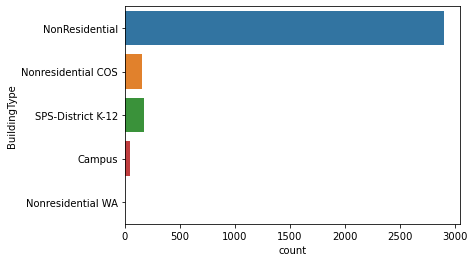

In [61]:
sns.countplot(y=df.BuildingType)

In [62]:
df['BuildingType'].value_counts()

NonResidential        2899
SPS-District K-12      176
Nonresidential COS     152
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

il n'y a qu'une seule valeur pour 'Nonresidential WA', ce qui risque de poser des problèmes lors de la séparation du jeu de données; nous allons éliminer cette ligne :

In [63]:
index_to_drop=df[df['BuildingType']=="Nonresidential WA"].index
df.drop(index_to_drop, inplace=True)

In [64]:
# Quels sont ces bâtiments référencés 'NonResidential' et qui représentent la majeure partie des bâtiments.

df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()


Small- and Mid-Sized Office    574
Other                          374
Large Office                   331
Mixed Use Property             201
Retail Store                   190
Warehouse                      180
Non-Refrigerated Warehouse     178
Hotel                          148
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     39
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert


Les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non résidentiels.

In [65]:
df.loc[(df['PrimaryPropertyType']=="University")|
       (df['PrimaryPropertyType']=="College/University")]

# 24 104

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
24,30,NonResidential,College/University,DOWNTOWN,1.0,7.0,126593,0,126593,College/University,125000.0,NaN,9.791557e+06,0.0,4582663.0,5209084.0,308.60,87
104,170,NonResidential,College/University,EAST,1.0,3.0,63330,0,63330,College/University,64820.0,NaN,2.755578e+06,0.0,1863973.0,891682.0,60.35,100
105,172,Campus,College/University,DELRIDGE,1.0,2.0,441071,0,441071,College/University,483000.0,NaN,3.743078e+07,0.0,24886028.0,12545788.0,839.79,45
114,182,NonResidential,College/University,MAGNOLIA / QUEEN ANNE,1.0,2.0,52611,0,52611,College/University,52611.0,NaN,4.399828e+06,0.0,2782111.0,1617832.0,105.32,35
127,211,Campus,College/University,NORTHWEST,11.0,2.0,694072,111625,582447,College/University,667265.0,NaN,3.711721e+07,0.0,33183593.0,3934997.0,440.31,45
583,777,NonResidential,College/University,CENTRAL,1.0,2.0,60122,0,60122,College/University,60122.0,NaN,5.527290e+05,0.0,552752.0,0.0,3.85,99
635,851,NonResidential,College/University,CENTRAL,1.0,4.0,76700,0,76700,College/University,114000.0,NaN,7.011508e+06,0.0,6605603.0,406180.0,67.62,41
777,19833,NonResidential,College/University,DOWNTOWN,1.0,2.0,28923,0,28923,College/University,28800.0,NaN,4.563970e+05,0.0,190991.0,265414.0,15.43,23
779,19836,NonResidential,College/University,DOWNTOWN,1.0,3.0,21600,0,21600,College/University,21600.0,NaN,3.154680e+05,0.0,228983.0,86495.0,6.19,87
907,20166,NonResidential,College/University,DOWNTOWN,1.0,3.0,28800,0,28800,College/University,28800.0,NaN,7.313150e+05,0.0,652653.0,78689.0,8.73,105


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3273 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3273 non-null   int64  
 1   BuildingType               3273 non-null   object 
 2   PrimaryPropertyType        3273 non-null   object 
 3   Neighborhood               3273 non-null   object 
 4   NumberofBuildings          3273 non-null   float64
 5   NumberofFloors             3273 non-null   float64
 6   PropertyGFATotal           3273 non-null   int64  
 7   PropertyGFAParking         3273 non-null   int64  
 8   PropertyGFABuilding(s)     3273 non-null   int64  
 9   LargestPropertyUseType     3202 non-null   object 
 10  LargestPropertyUseTypeGFA  3202 non-null   float64
 11  ENERGYSTARScore            2190 non-null   float64
 12  SiteEnergyUse(kBtu)        3265 non-null   float64
 13  SteamUse(kBtu)             3265 non-null   float

In [67]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    574
Other                          374
Large Office                   331
Mixed Use Property             201
Retail Store                   190
Warehouse                      180
Non-Refrigerated Warehouse     178
Hotel                          148
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     39
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert

In [68]:
df=df.replace(to_replace=[ 'Restaurant\n'], 
              value=['Restaurant'])

In [69]:
df.loc[(df['BuildingType']=="Nonresidential COS"),'PrimaryPropertyType'].value_counts()

Other                          104
Mixed Use Property              11
Small- and Mid-Sized Office      8
Warehouse                        7
Large Office                     7
Non-Refrigerated Warehouse       6
Office                           3
Distribution Center              2
Medical Office                   2
Distribution Center\n            2
Name: PrimaryPropertyType, dtype: int64

In [70]:
df.loc[(df['BuildingType']=="Campus"),'PrimaryPropertyType'].value_counts()

Other                   14
K-12 School              8
Mixed Use Property       7
University               6
College/University       5
Restaurant               2
Large Office             2
Low-Rise Multifamily     2
Name: PrimaryPropertyType, dtype: int64

"Low-Rise Multifamily" dans "Campus" et "NonResidential" est une erreur. Nous supprimons ces lignes.

In [71]:
data_anomalies = df[~df['BuildingType'].str.contains("Multifamily") & df['PrimaryPropertyType'].str.contains("Multifamily")]
display(data_anomalies)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
1311,21481,Campus,Low-Rise Multifamily,DOWNTOWN,1.0,4.0,45500,0,45500,Multifamily Housing,22669.0,NaN,3.863772e+06,0.0,3863933.0,0.0,26.94,73
2481,25674,NonResidential,Low-Rise Multifamily,EAST,1.0,3.0,32100,0,32100,Multifamily Housing,21400.0,NaN,9.385100e+04,0.0,6581.0,87270.0,4.68,105
644,19445,NonResidential,Low-Rise Multifamily,LAKE UNION,1.0,3.0,93079,36093,56986,Multifamily Housing,91064.0,32.0,1.997182e+06,0.0,1744199.0,252982.0,25.60,16
1300,21481,Campus,Low-Rise Multifamily,DOWNTOWN,1.0,4.0,45500,0,45500,Multifamily Housing,22669.0,NaN,3.778355e+06,0.0,3778355.0,0.0,26.34,74
2450,25674,NonResidential,Low-Rise Multifamily,EAST,1.0,3.0,32100,0,32100,Multifamily Housing,21400.0,NaN,1.082004e+05,0.0,11370.0,96830.0,5.22,106


In [72]:
invalid_id=[19445, 21481, 25674]

In [73]:
mask = ~df['OSEBuildingID'].isin(invalid_id)
df=df.loc[mask]

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

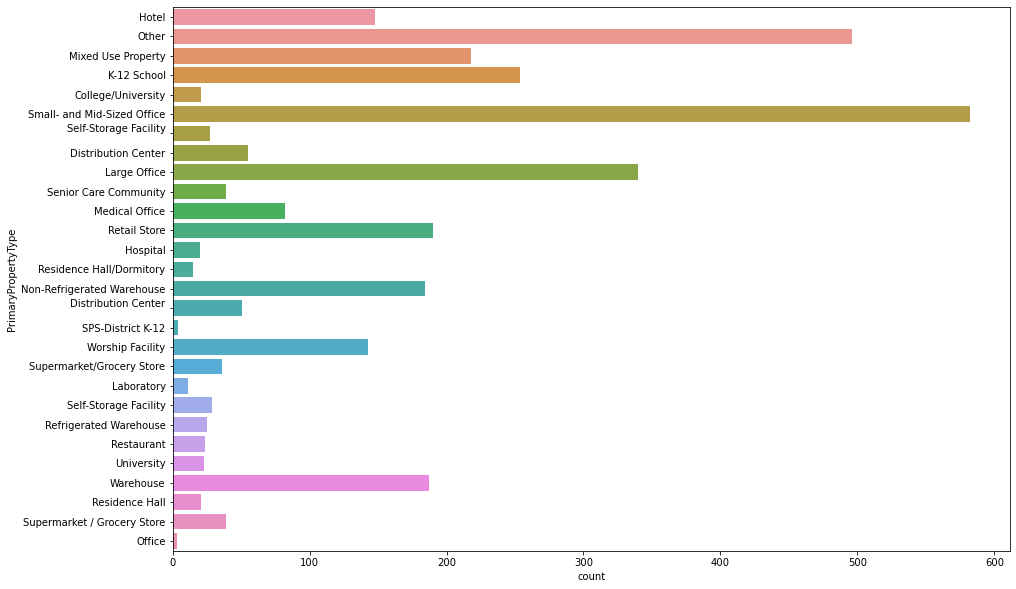

In [74]:
plt.figure(figsize=(15, 10))
sns.countplot(y='PrimaryPropertyType', data=df)

In [75]:
df.LargestPropertyUseType.unique()


array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       nan, 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Public S

In [76]:
dictionary = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Performing Arts': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center': 'Leisure',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',
                
                'K-12 School' : 'Education',
                'Other - Education': 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

In [77]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace(dictionary)

In [78]:
df.LargestPropertyUseType.unique()

array(['Hotel/Senior Care/Housing', 'Police Station',
       'Other - Entertainment/Public Assembly', nan, 'Education',
       'Leisure', 'Courthouse', 'Other', 'Retail', 'Office',
       'Self-Storage Facility', 'Health',
       'Hospital (General Medical & Surgical)',
       'Other/Specialty Hospital', 'Non-Refrigerated Warehouse',
       'Distribution Center', 'Parking', 'Laboratory',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Refrigerated Warehouse', 'Data Center',
       'Manufacturing/Industrial Plant', 'Fire Station',
       'Other - Utility', 'Outpatient Rehabilitation/Physical Therapy',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Prison/Incarceration'], dtype=object)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3267 non-null   int64  
 1   BuildingType               3267 non-null   object 
 2   PrimaryPropertyType        3267 non-null   object 
 3   Neighborhood               3267 non-null   object 
 4   NumberofBuildings          3267 non-null   float64
 5   NumberofFloors             3267 non-null   float64
 6   PropertyGFATotal           3267 non-null   int64  
 7   PropertyGFAParking         3267 non-null   int64  
 8   PropertyGFABuilding(s)     3267 non-null   int64  
 9   LargestPropertyUseType     3197 non-null   object 
 10  LargestPropertyUseTypeGFA  3197 non-null   float64
 11  ENERGYSTARScore            2188 non-null   float64
 12  SiteEnergyUse(kBtu)        3259 non-null   float64
 13  SteamUse(kBtu)             3259 non-null   float

In [80]:
df_sans_score=df.drop('ENERGYSTARScore', axis=1)

In [81]:
df_sans_score=df_sans_score.dropna(axis=0, how='any')

In [82]:
df_sans_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3375
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3191 non-null   int64  
 1   BuildingType               3191 non-null   object 
 2   PrimaryPropertyType        3191 non-null   object 
 3   Neighborhood               3191 non-null   object 
 4   NumberofBuildings          3191 non-null   float64
 5   NumberofFloors             3191 non-null   float64
 6   PropertyGFATotal           3191 non-null   int64  
 7   PropertyGFAParking         3191 non-null   int64  
 8   PropertyGFABuilding(s)     3191 non-null   int64  
 9   LargestPropertyUseType     3191 non-null   object 
 10  LargestPropertyUseTypeGFA  3191 non-null   float64
 11  SiteEnergyUse(kBtu)        3191 non-null   float64
 12  SteamUse(kBtu)             3191 non-null   float64
 13  Electricity(kBtu)          3191 non-null   float

In [83]:
df_sans_score.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
count,3191.000000,3191.000000,3191.000000,3.191000e+03,3191.000000,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3191.000000,3191.000000
mean,16027.041366,1.134754,4.139141,1.158207e+05,13384.140081,1.024366e+05,9.530470e+04,8.133271e+06,4.867300e+05,5.673653e+06,1.904600e+06,178.275525,54.014416
std,13337.383426,2.254779,6.617357,2.540040e+05,43959.185056,2.367210e+05,2.286185e+05,2.561856e+07,5.249499e+06,1.764861e+07,8.027895e+06,674.340438,32.785019
min,1.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,1.000000
25%,587.000000,1.000000,1.000000,2.939200e+04,0.000000,2.834400e+04,2.545000e+04,1.233459e+06,0.000000e+00,7.265775e+05,0.000000e+00,20.070000,27.000000
50%,21138.000000,1.000000,2.000000,4.878900e+04,0.000000,4.671000e+04,4.285000e+04,2.520919e+06,0.000000e+00,1.615057e+06,4.960960e+05,49.440000,50.000000
75%,24543.000000,1.000000,4.000000,1.041480e+05,0.000000,9.400200e+04,8.975950e+04,6.916286e+06,0.000000e+00,4.896583e+06,1.487977e+06,139.225000,86.000000
max,50226.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,116.000000


In [84]:
df_sans_score[df_sans_score['PropertyGFATotal']>9000000]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
3274,49967,Campus,University,NORTHEAST,111.0,1.0,9320156,0,9320156,Education,9320156.0,873923712.0,84985240.0,657074389.0,0.0,11140.56,116


In [85]:
index_to_drop=df_sans_score[df_sans_score['PropertyGFATotal']>9000000].index
df_sans_score.drop(index_to_drop, inplace=True)

In [86]:
df_sans_score.loc[(df_sans_score['SteamUse(kBtu)']>0.000000e+00)] 

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
0,1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,0,88434,Hotel/Senior Care/Housing,88434.0,6981428.0,2023032.00,3686160.0,1272388.0,249.43,88
2,3,NonResidential,Hotel,DOWNTOWN,1.0,41.0,961990,0,961990,Hotel/Senior Care/Housing,757243.0,73130656.0,19660404.00,49762435.0,3709900.0,2061.48,46
3,5,NonResidential,Hotel,DOWNTOWN,1.0,10.0,61320,0,61320,Hotel/Senior Care/Housing,61320.0,28229320.0,23458518.00,2769023.0,2001894.0,1936.34,89
7,11,NonResidential,Other,DOWNTOWN,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,6426022.0,2003108.00,4108004.0,315079.0,199.99,89
11,16,NonResidential,Hotel,DOWNTOWN,1.0,25.0,333176,61161,272015,Hotel/Senior Care/Housing,336640.0,27717026.0,5426396.00,19058722.0,3232700.0,723.40,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,32429,NonResidential,Restaurant,DOWNTOWN,1.0,13.0,42000,0,42000,Leisure,26554.0,7798464.0,2513519.25,4351882.0,933062.0,273.91,31
3156,45927,NonResidential,Laboratory,EAST,1.0,8.0,178000,0,178000,Laboratory,181930.0,53166156.0,31030194.00,22135959.0,0.0,2549.47,16
3182,49725,NonResidential,Other,EAST,1.0,7.0,267470,0,267470,Other,160482.0,42584028.0,18547858.00,23795911.0,0.0,1597.56,4
3261,49926,NonResidential,University,EAST,1.0,3.0,428347,0,428347,Education,472384.0,37022180.0,13556219.00,21930618.0,1535341.0,1280.81,91


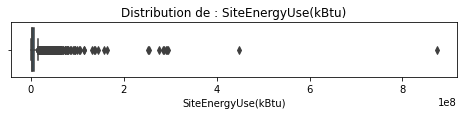

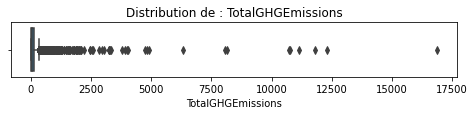

In [87]:
# •Représenter visuellement et comparer la distribution des variables target, à l'aide par exemple d'un boxplot.

var_num = df_sans_score[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

Je supprime certaines lignes avec des valeurs extrêmes d'émissions de co2 Je supprime les 5% des valeurs les plus élevées et les 5% des valeurs les plus basses, je les considère comme des valeurs aberrantes

In [88]:
borne=round(np.percentile(df_sans_score["TotalGHGEmissions"].values, 95),2)
df_sans_score=df_sans_score.loc[df_sans_score["TotalGHGEmissions"]<borne]
borne2=round(np.percentile(df_sans_score["TotalGHGEmissions"].values, 5),2)
df_sans_score=df_sans_score.loc[df_sans_score["TotalGHGEmissions"]>borne2]

In [89]:
borne=round(np.percentile(df_sans_score["SiteEnergyUse(kBtu)"].values, 95),2)
df_sans_score=df_sans_score.loc[df_sans_score["SiteEnergyUse(kBtu)"]<borne]
borne2=round(np.percentile(df_sans_score["SiteEnergyUse(kBtu)"].values, 5),2)
df_sans_score=df_sans_score.loc[df_sans_score["SiteEnergyUse(kBtu)"]>borne2]

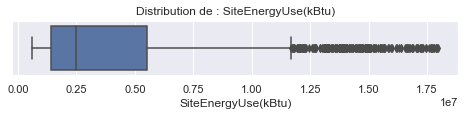

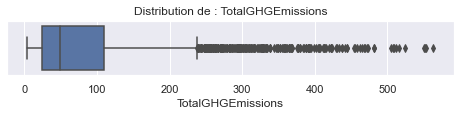

In [90]:
# •Représenter visuellement et comparer la distribution des variables target, à l'aide par exemple d'un boxplot.

var_num = df_sans_score[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df_sans_score[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

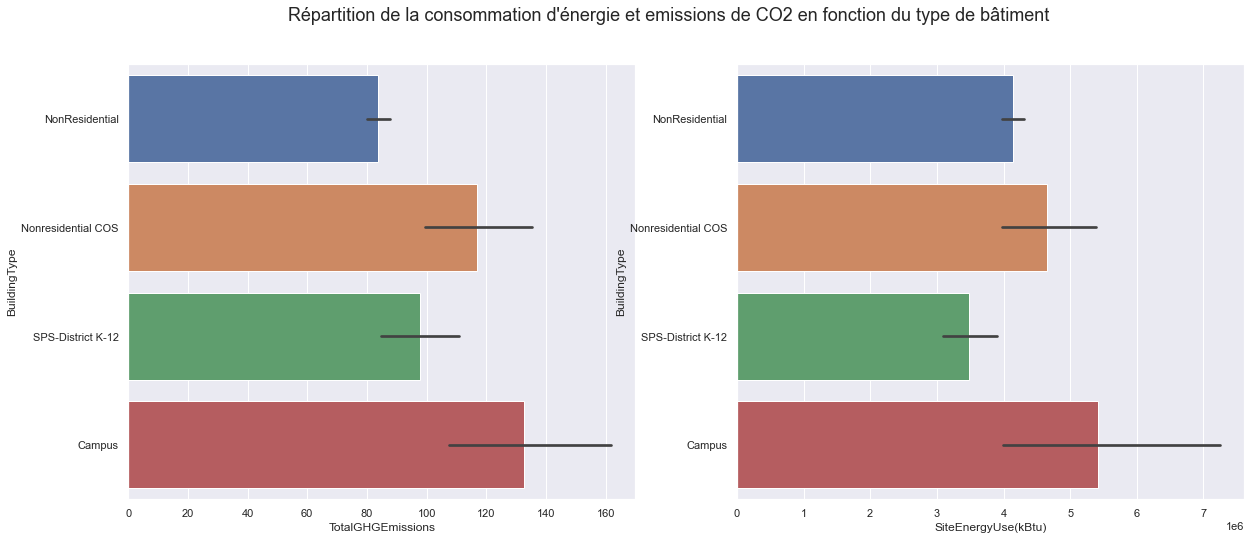

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(y='BuildingType',x='TotalGHGEmissions',data=df_sans_score, ax=axes[0])
sns.barplot(y='BuildingType',x='SiteEnergyUse(kBtu)',data=df_sans_score, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", fontsize=18)
plt.show()

+ Analysez une variable quantitative et une qualitative par ANOVA

In [92]:
# X = "BuildingType" # qualitative
# Y = "TotalGHGEmissions"    # quantitative

def box_plot(X,Y, df):
    modalites = df[X].unique()
    groupes = []
    for m in modalites:
        groupes.append(df[df[X]==m][Y])

    # Propriétés graphiques (pas très importantes)    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()

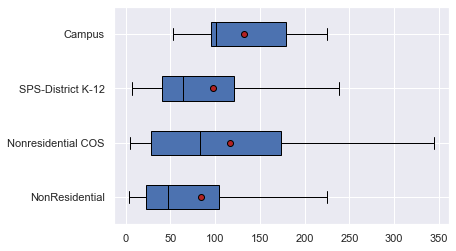

In [93]:
box_plot("BuildingType","TotalGHGEmissions", df_sans_score)

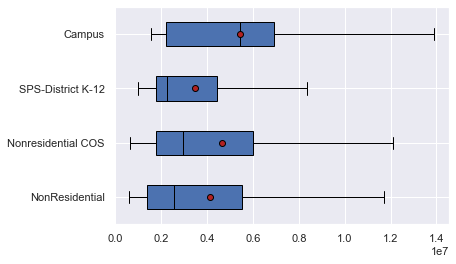

In [94]:
box_plot("BuildingType","SiteEnergyUse(kBtu)", df_sans_score)

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit ici que la quantité de TotalGHGEmissions sont légèrement différents d'une catégorie à l'autre. Mais vérifions maintenant cette affirmation par les chiffres, grâce à une modélisation.

Красные точки в середине каждой диаграммы представляют среднее значение.

Здесь мы видим, что количество TotalGHGEmissions немного отличается от одной категории к другой. Но давайте теперь проверим это утверждение цифрами, благодаря модели.

In [95]:

# X = "BuildingType" # qualitative
# Y = "TotalGHGEmissions"    # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(df_sans_score['BuildingType'], df_sans_score['TotalGHGEmissions'])

0.008634522934735671

In [96]:
eta_squared(df_sans_score['BuildingType'], df_sans_score['SiteEnergyUse(kBtu)'])

0.0036211529704933605

On obtient un résultat de 0.01 ce qui laisse penser qu'il y n'a pas une corrélation entre le "BuildingType" et "TotalGHGEmissions".

La distribution de la variable "TotalGHGEmissions" dépend de la valeur de "Campus". Par conséquent, prêtons attention à la variable "PrimaryPropertyType".

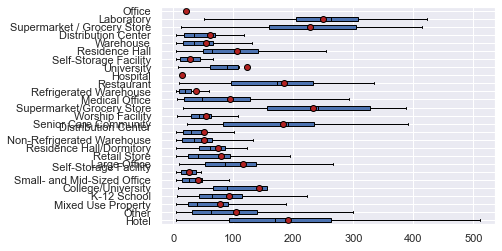

In [97]:
box_plot("PrimaryPropertyType","TotalGHGEmissions", df_sans_score)

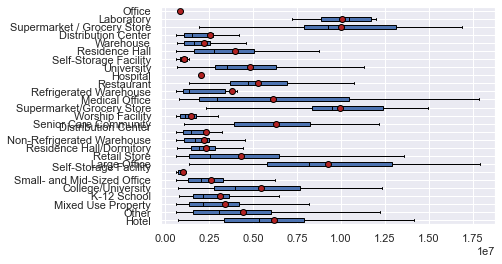

In [98]:
box_plot("PrimaryPropertyType","SiteEnergyUse(kBtu)", df_sans_score)

In [99]:
eta_squared(df_sans_score['PrimaryPropertyType'], df_sans_score['TotalGHGEmissions'])

0.23273395619721124

In [100]:
eta_squared(df_sans_score['PrimaryPropertyType'], df_sans_score['SiteEnergyUse(kBtu)'])

0.34602874398592504

On obtient un résultat proche de 0.2, ce qui laisse penser qu'il y une faible corrélation entre le 'PrimaryPropertyType' et 'TotalGHGEmissions'. C'est ce que nous avions observé sur le graphique.

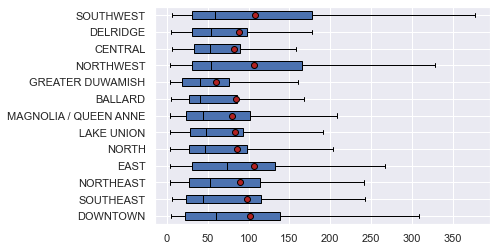

In [101]:
box_plot("Neighborhood","TotalGHGEmissions", df_sans_score)

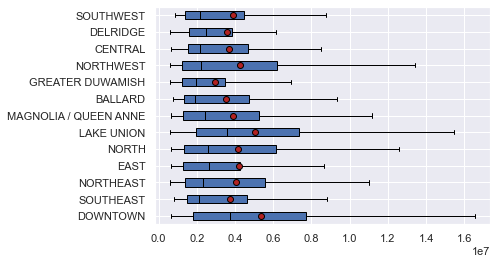

In [102]:
box_plot("Neighborhood","SiteEnergyUse(kBtu)", df_sans_score)

In [103]:
eta_squared(df_sans_score['Neighborhood'], df_sans_score['TotalGHGEmissions'])

0.028652483636882876

In [104]:
eta_squared(df_sans_score['Neighborhood'], df_sans_score['SiteEnergyUse(kBtu)'])

0.0479982148798979

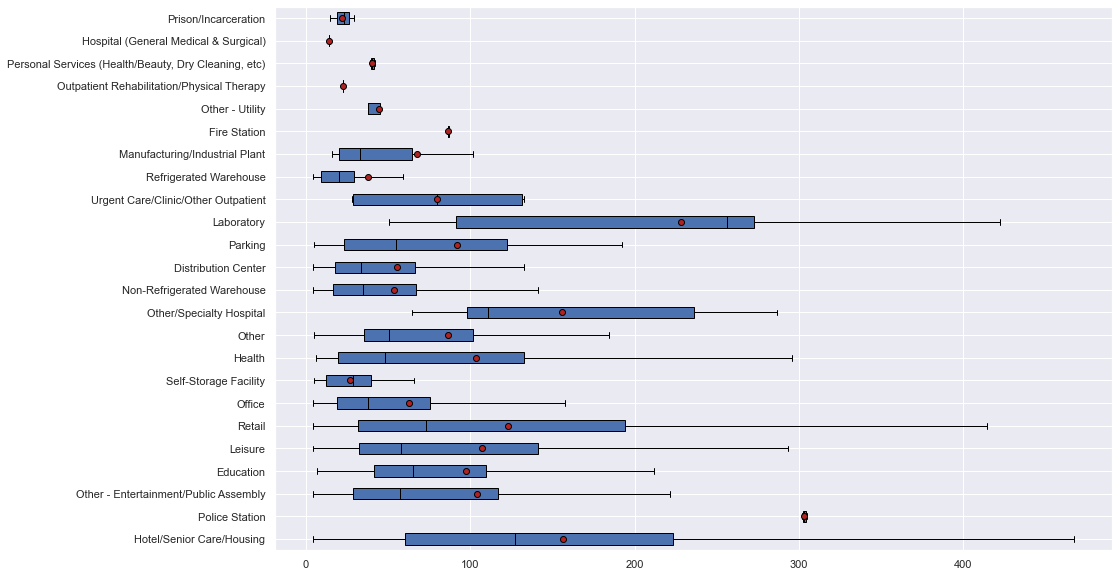

In [105]:
X = "LargestPropertyUseType" # qualitative
Y = "TotalGHGEmissions"    # quantitative

modalites = df_sans_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_sans_score[df_sans_score[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize = (15,10))     
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


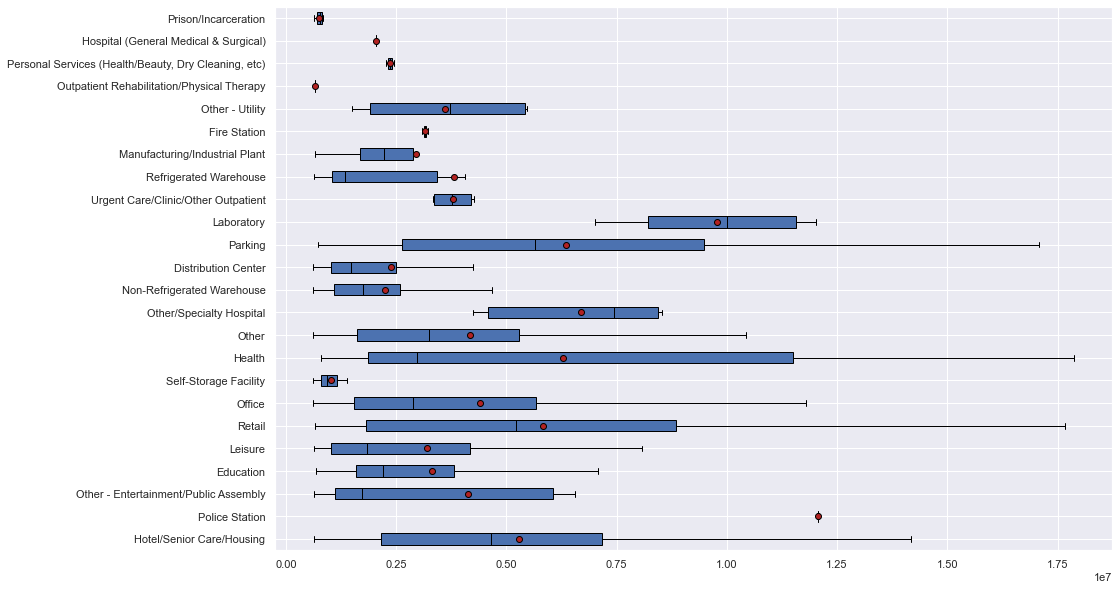

In [106]:

X = "LargestPropertyUseType" # qualitative
Y = "SiteEnergyUse(kBtu)"    # quantitative

modalites = df_sans_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_sans_score[df_sans_score[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize = (15,10))     
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


In [107]:
eta_squared(df_sans_score['LargestPropertyUseType'], df_sans_score['TotalGHGEmissions'])

0.12330499050112052

In [108]:
eta_squared(df_sans_score['LargestPropertyUseType'], df_sans_score['SiteEnergyUse(kBtu)'])

0.10694363875710441

# Analyse exploratoire & Feature Engineering

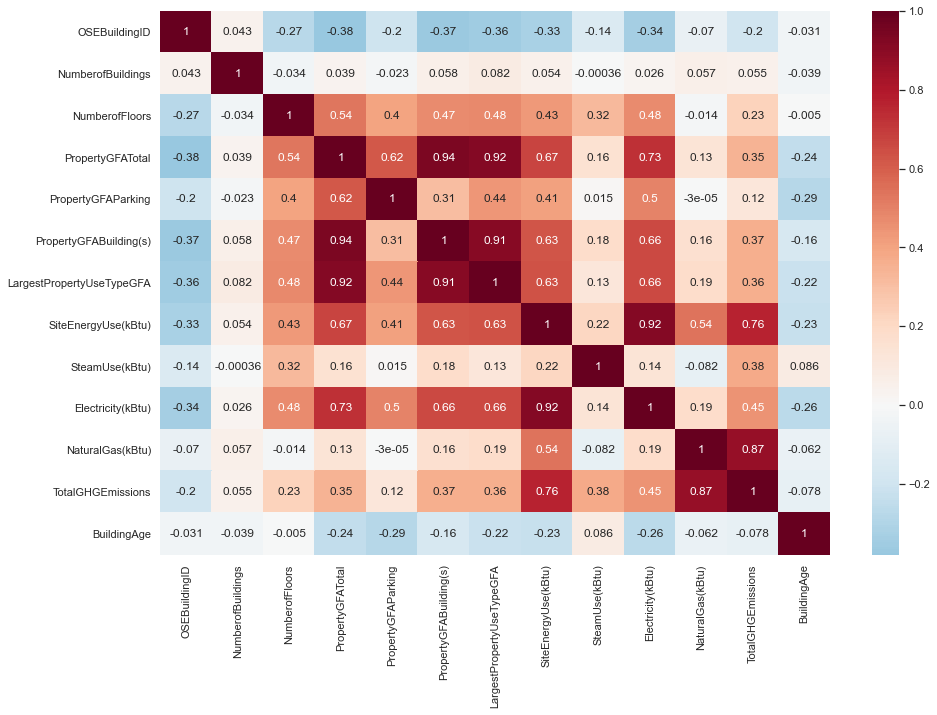

In [109]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_sans_score.corr(), annot=True, cmap='RdBu_r', center=0);

+ TotalGHGEmissions
+ SiteEnergyUse(kBtu)

In [110]:
corr = df_sans_score.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

Les fortes corrélations visibles sur le heatmap peuvent amener des problèmes de colinéarité dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [111]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
12,PropertyGFABuilding(s),PropertyGFATotal,0.938133
10,LargestPropertyUseTypeGFA,PropertyGFATotal,0.915485
8,Electricity(kBtu),SiteEnergyUse(kBtu),0.915398
6,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.912972
4,TotalGHGEmissions,NaturalGas(kBtu),0.865271
2,TotalGHGEmissions,SiteEnergyUse(kBtu),0.763671
0,Electricity(kBtu),PropertyGFATotal,0.725782


In [112]:
# df=df.drop('PropertyGFATotal', axis=1)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, PropertyGFAParking, PropertyGFABuilding(s).

In [109]:
# #On calcule les ratios

df_sans_score['GFABuildingRate'] = (round((df_sans_score['PropertyGFABuilding(s)'] /df_sans_score['PropertyGFATotal']),5))

df_sans_score['GFAParkingRate'] = (round((df_sans_score['PropertyGFAParking'] /df_sans_score['PropertyGFATotal']),5))
                                                               

In [110]:
#On supprime les variables inutiles
df_sans_score = df_sans_score.drop(['LargestPropertyUseTypeGFA', 
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1)

In [111]:
df_sans_score=df_sans_score.set_index('OSEBuildingID')

In [112]:
df_sans_score.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,,,,,,,
1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,Hotel/Senior Care/Housing,6981428.0,2023032.0,3686160.0,1272388.0,249.43,88,1.00000,0.00000
2,NonResidential,Hotel,DOWNTOWN,1.0,11.0,103566,Hotel/Senior Care/Housing,8354235.0,0.0,3905411.0,4448985.0,263.51,19,0.85455,0.14545
8,NonResidential,Hotel,DOWNTOWN,1.0,18.0,119890,Hotel/Senior Care/Housing,14829099.0,0.0,6066245.0,8763105.0,507.70,35,0.89607,0.10393
9,Nonresidential COS,Other,DOWNTOWN,1.0,2.0,97288,Police Station,12051984.0,0.0,7271004.0,4781283.0,304.62,16,0.61765,0.38235
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,83008,Hotel/Senior Care/Housing,6252842.0,0.0,2679698.0,3573255.0,208.46,89,1.00000,0.00000


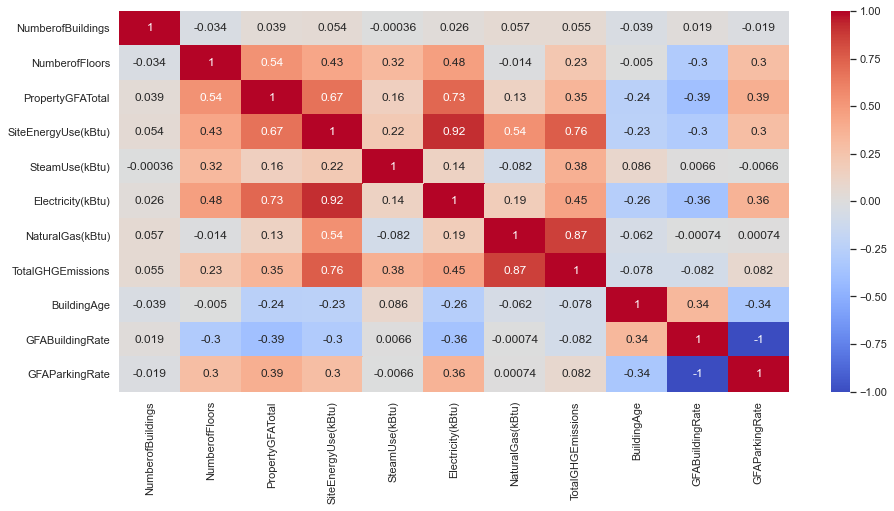

In [117]:
# Création d'une matrice de corrélation variable

cor = df_sans_score.corr()
plt.figure(figsize = (15,7))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');


In [118]:
corr = df_sans_score.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [119]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
8,SiteEnergyUse(kBtu),Electricity(kBtu),0.915398
6,TotalGHGEmissions,NaturalGas(kBtu),0.865271
4,TotalGHGEmissions,SiteEnergyUse(kBtu),0.763671
2,PropertyGFATotal,Electricity(kBtu),0.725782
0,GFABuildingRate,GFAParkingRate,-1.000000


Vérification de multicolinéarité avec le VIF (Variance Inflation Factor) :
VIF=1/1-R*R

Des scores VIF supérieur à 5 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.

Проверка мультиколлинеарности с помощью VIF (фактор инфляции дисперсии):
ВИФ=1/1-R*R

Показатели VIF выше 5 обычно указывают на сильную мультиколлинеарность. Эти сильно коррелированные переменные могут повлиять на наши модели.

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df_sans_score[strong_corr_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

,feature,VIF
1,NaturalGas(kBtu),10.686598
2,SiteEnergyUse(kBtu),369.819640
3,TotalGHGEmissions,44.234711
6,Electricity(kBtu),208.862151
